In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime



In [10]:
data=pd.read_csv("TSLA_stock_price_train.csv", index_col="Date",parse_dates=True)

In [27]:
len(data)

2539

In [12]:
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2539 entries, 2010-06-30 to 2020-07-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2539 non-null   float64
 1   High       2539 non-null   float64
 2   Low        2539 non-null   float64
 3   Close      2539 non-null   float64
 4   Adj Close  2539 non-null   float64
 5   Volume     2539 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.9 KB


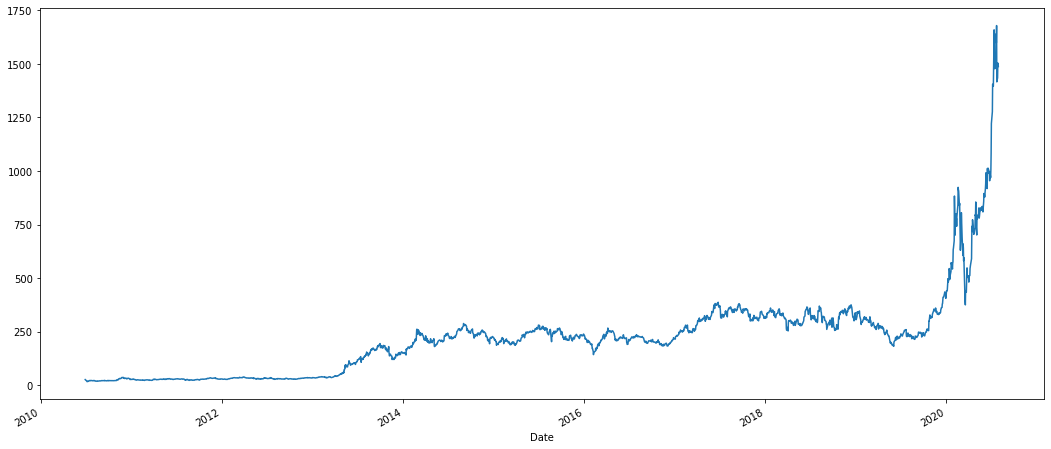

In [18]:
data['Open'].plot(figsize=(18,8))

In [19]:
#7 day rolling mean
data.rolling(7).mean().head(30)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-09,20.558571,21.641428,17.887142,18.822857,18.822857,8.013757e+06
2010-07-12,19.438571,19.877143,16.987143,17.854286,17.854286,5.873100e+06
2010-07-13,18.351428,18.837143,16.505714,17.308571,17.308571,5.081857e+06


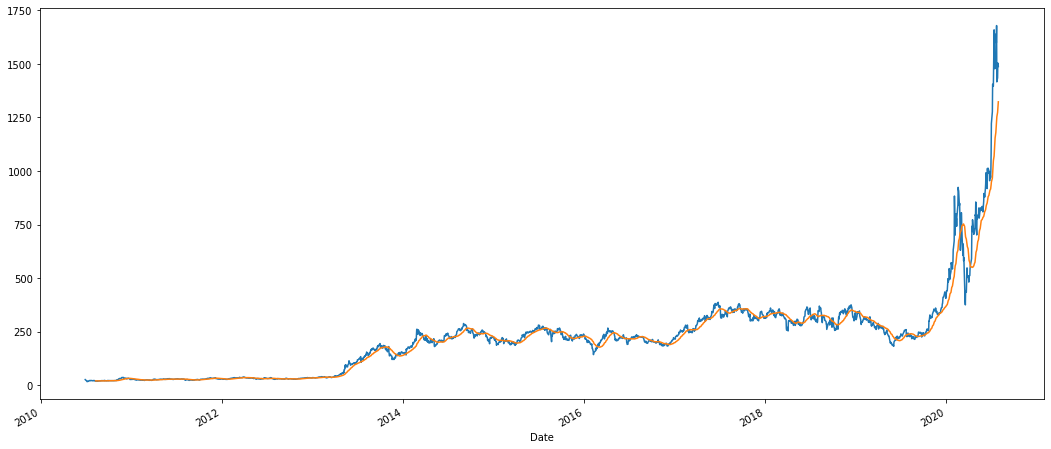

In [21]:
data['Open'].plot(figsize=(18,8))
data.rolling(window=30).mean()['Close'].plot()

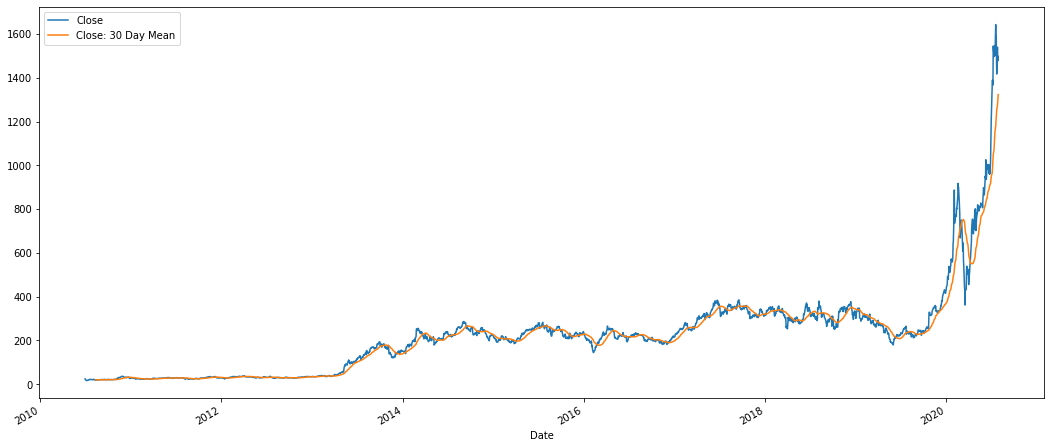

In [22]:
data['Close: 30 Day Mean']=data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 Day Mean']].plot(figsize=(18,8))

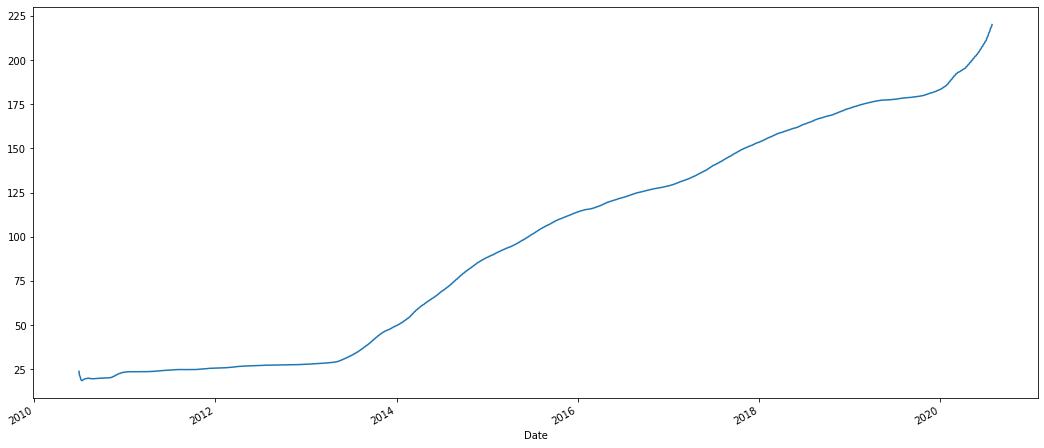

In [23]:
# specify a minimum number of periods
data['Close'].expanding(min_periods=1).mean().plot(figsize=(18,8))

In [25]:
training_set=data['Open']
training_set=pd.DataFrame(training_set)

In [26]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [28]:
#Creating a data structure with 60 timesteps and 1 output
X_train =[]
y_train=[]
for i in range(60,2539):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [54]:
#BUILDING THE RNN

#importing  the keras libraries and packages 

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\SOBHAN\Documents\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SOBHAN\Documents\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SOBHAN\Documents\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SOBHAN\Documents\anaconda\lib\site-packag

In [55]:
#initialising the RNN
regressor= Sequential()

In [56]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [57]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
2479/2479 [==============================] - 10s 4ms/step - loss: 0.0041
Epoch 2/100
2479/2479 [==============================] - 8s 3ms/step - loss: 0.0013
Epoch 3/100
2479/2479 [==============================] - 8s 3ms/step - loss: 0.0014
Epoch 4/100
2479/2479 [==============================] - 9s 3ms/step - loss: 0.0011
Epoch 5/100
2479/2479 [==============================] - 8s 3ms/step - loss: 9.3410e-04
Epoch 6/100
2479/2479 [==============================] - 8s 3ms/step - loss: 0.0010
Epoch 7/100
2479/2479 [==============================] - 8s 3ms/step - loss: 0.0011
Epoch 8/100
2479/2479 [==============================] - 8s 3ms/step - loss: 8.6574e-04
Epoch 9/100
2479/2479 [==============================] - 8s 3ms/step - loss: 6.8570e-04
Epoch 10/100
2479/2479 [==============================] - 8s 3ms/step - loss: 6.0270e-04
Epoch 11/100
2479/2479 [==============================] - 9s 4ms/step - loss: 0.0011
Epoch 12/100
2479/2479 [==============================] 

In [60]:
#MAKING THE PREDICTIONS AND VISUALISING THE RESULTS
#Getting the real stock price of 2020
data_test=pd.read_csv('TSLA_stock_price_test.csv',index_col="Date", parse_dates=True)

In [62]:
real_stock_price=data_test.iloc[:, 1:2].values

In [63]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,1449.199951,1509.810059,1444.380005,1485.000000,1485.000000,8809300
2020-08-04,1495.010010,1527.410034,1462.000000,1487.000000,1487.000000,8415000
2020-08-05,1492.989990,1499.839966,1468.310059,1485.020020,1485.020020,4978000
2020-08-06,1490.829956,1517.310059,1477.260010,1489.579956,1489.579956,5992300
2020-08-07,1499.540039,1499.750000,1415.010010,1452.709961,1452.709961,8883500


In [64]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2020-08-03 to 2020-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       20 non-null     float64
 1   High       20 non-null     float64
 2   Low        20 non-null     float64
 3   Close      20 non-null     float64
 4   Adj Close  20 non-null     float64
 5   Volume     20 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [65]:
test_set=data_test['Open']
test_set=pd.DataFrame(test_set)

In [66]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2020-08-03 to 2020-08-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [68]:
# Getting the predicted stock price of 2020
data_total= pd.concat((data['Open'], data_test['Open']), axis=0)
inputs= data_total[len(data_total)- len(data_test)- 60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [69]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


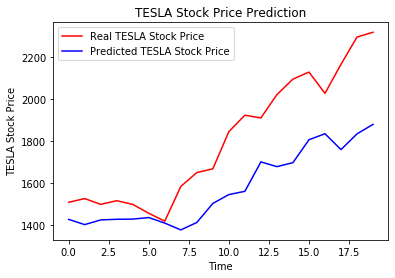

In [71]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

